In [1]:
import pandas as pd
import json

df = pd.read_csv("data/0721-month-analysis-data.csv")
analyzed_homepages = pd.read_json("homepage_data_analyzed.json", encoding='utf-8')


In [3]:
standard_columns = ['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score', 'cultural_melding_ideas', 'cultural_melding_score', 
       'mainland_china_origin_ideas', 'mainland_china_origin_score', 'highlighting_china_organization_score',
       'highlighting_china_organization_ideas', 'name']
analyzed_homepages = analyzed_homepages[standard_columns]

In [4]:
analyzed_homepages.columns

Index(['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score', 'cultural_melding_ideas',
       'cultural_melding_score', 'mainland_china_origin_ideas',
       'mainland_china_origin_score', 'highlighting_china_organization_score',
       'highlighting_china_organization_ideas', 'name'],
      dtype='object')

In [5]:
pooled_scores = {
    "total_reconciliation_score": ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score'],
    "total_camouflage_score": ["cultural_melding_score", "mainland_china_origin_score", "highlighting_china_organization_score"]
}

for key, columns_to_convert in pooled_scores.items():
    for column in columns_to_convert:
        analyzed_homepages[column] = pd.to_numeric(analyzed_homepages[column], errors='coerce').fillna(0).astype(int)
    analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)

In [6]:
merged_df = pd.merge(df, analyzed_homepages, left_on='Researcher Cleaned Name', right_on='name', how='inner')
merged_df.drop(columns=['name'], inplace=True)
merged_df.to_csv("data/0721-month-analysis-data-merged.csv", index=False)

In [7]:
merged_df.columns

Index(['Researcher Cleaned Name', 'year', 'month', 'num_sg_mean',
       'num_sg_error', 'num_hk_mean', 'num_hk_error', 'num_ml_mean',
       'num_ml_error', 'num_other_mean', 'num_other_error', 'teamsize_mean',
       'teamsize_error', 'prop_sg_mean', 'prop_sg_error', 'prop_hk_mean',
       'prop_hk_error', 'prop_ml_mean', 'prop_ml_error', 'prop_other_mean',
       'prop_other_error', 'total_citations_mean', 'total_citations_error',
       'Name', 'Researcher Classification', 'Left after 2014', 'PhD Location',
       'Master Location', 'Bachelor Location', 'Leaving Region', 'Join Year',
       'Join Month', 'PhD Year', 'Master Year', 'Bachelor Year', 'Department',
       'Title', 'First Year', 'Leaving Year', 'Leaving Month', 'Academic Age',
       'Pre-2014 School', 'Post Event', 'Pre-2014 Region',
       'Number of Publications', 'general_analysis',
       'cross_group_thinking_ideas', 'cross_group_thinking_score',
       'unifying_language_ideas', 'unifying_language_score',
       

In [20]:
data = json.load(open("homepage_data_analyzed.json"))
for researcher in data:
    print(researcher["unifying_language_ideas"])

If the language used on the profile emphasizes global perspectives, integration, and synergy across diverse backgrounds, it indicates unifying language meant to bridge divides. It is important to see if the individual discusses their work in a way that connects with broader, inclusive narratives.
The language on the webpage should be examined for terms that emphasize unity and collective efforts across different backgrounds. This includes expressions like 'global collaboration,' 'our team,' 'diverse perspectives,' or any language that explicitly promotes inclusivity and joint effort. Such language indicates a strong preference for creating an atmosphere of togetherness and shared purpose, which is a hallmark of efforts toward reconciliation.
The language used is professional and globally oriented, with an emphasis on contributions to the broader academic community rather than regional achievements. However, explicit unifying language that overtly emphasizes bridging divides is not stro

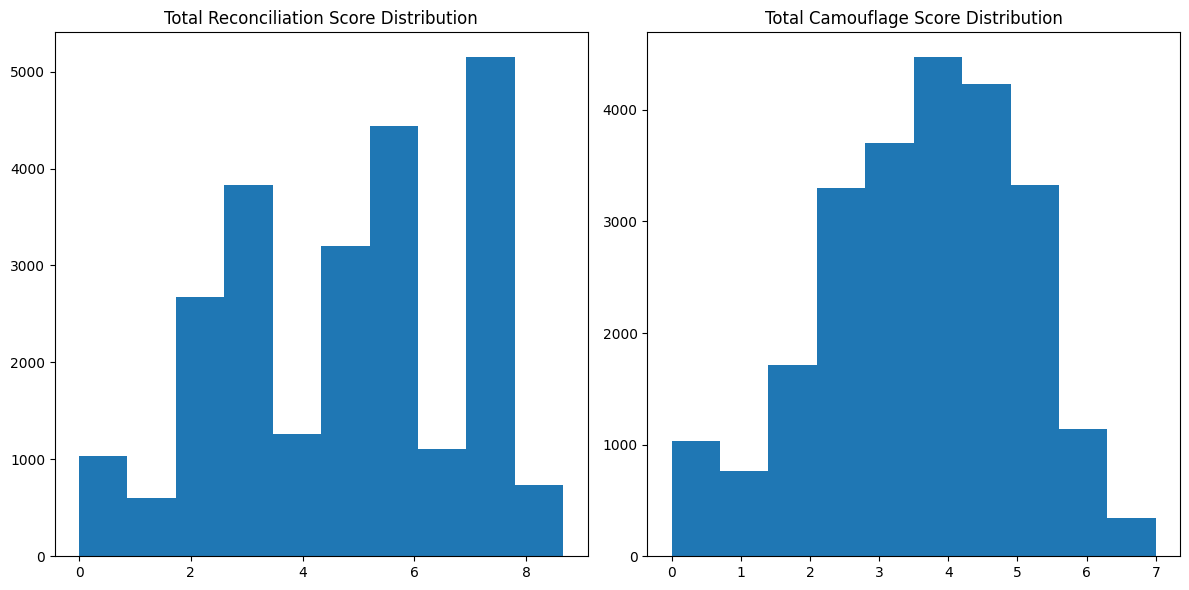

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(merged_df['total_reconciliation_score'])
axs[0].set_title("Total Reconciliation Score Distribution")

axs[1].hist(merged_df['total_camouflage_score'])
axs[1].set_title("Total Camouflage Score Distribution")

plt.tight_layout()
plt.show()

146